<a href="https://colab.research.google.com/github/Pluto-11/3D-Image-Classification/blob/main/3D_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# link:https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation


Mounted at /content/drive


In [ ]:
# Unzip the dataset
import zipfile
import os

# Specify the path to the archive.zip file in Google Drive
zip_path = '/content/drive/MyDrive/Colab Notebooks/FL/archive.zip'  # Replace with the actual path
dataset_dir = '/content/dataset'  # Directory to extract the dataset

# Extract the dataset if it's not already extracted
if not os.path.exists(dataset_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)
    print("Dataset extracted successfully.")
else:
    print("Dataset already extracted.")



Dataset extracted successfully.


In [ ]:
# Define the train and test directory paths after extraction
train_dir = os.path.join(dataset_dir, "BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData")
test_dir = os.path.join(dataset_dir, "BraTS2020/BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData")

In [ ]:

# Function to count patients and images for each modality in .nii files
def count_patients_and_images(directory):
    patient_count = 0
    image_count = 0

    for patient_folder in os.listdir(directory):
        patient_path = os.path.join(directory, patient_folder)

        # Check if it's a folder
        if os.path.isdir(patient_path):
            patient_count += 1

            # Count each modality file for the patient
            for modality in ["flair", "t1", "t1ce", "t2", "seg"]:
                modality_file = os.path.join(patient_path, f"{patient_folder}_{modality}.nii")
                if os.path.isfile(modality_file):
                    image_count += 1

    return patient_count, image_count

# Get counts for training and testing sets
train_patients, train_images = count_patients_and_images(train_dir)
test_patients, test_images = count_patients_and_images(test_dir)



In [ ]:
train_patients, train_images

(369, 1845)

In [ ]:
test_patients, test_images

(125, 500)

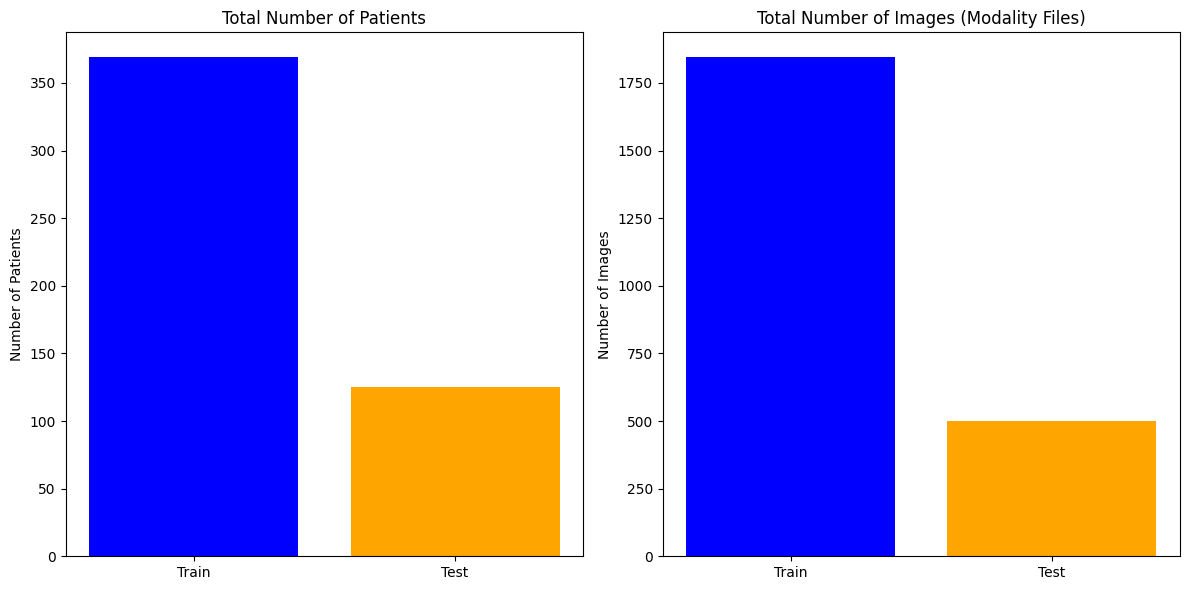

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for number of patients
ax[0].bar(["Train", "Test"], [train_patients, test_patients], color=["blue", "orange"])
ax[0].set_title("Total Number of Patients")
ax[0].set_ylabel("Number of Patients")

# Bar plot for number of images
ax[1].bar(["Train", "Test"], [train_images, test_images], color=["blue", "orange"])
ax[1].set_title("Total Number of Images (Modality Files)")
ax[1].set_ylabel("Number of Images")

plt.tight_layout()
plt.show()

In [ ]:
! pip install pillow
! pip install imageio

!pip install nilearn

! pip install nibabel
! pip install pynrrd

! pip install pydicom

!pip install imageio
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.5 MB/s eta 0:00:00


In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from tqdm import tqdm
from matplotlib import cm

In [ ]:
from IPython.display import Image, display

def show_gif(filepath):
    display(Image(filename=filepath))


In [ ]:
# image = imageio.imread(fname)
# image = resize(image, (images[0].shape[0], images[0].shape[1])) # Resize to the dimensions of the first image
# images.append(image)

NameError: name 'fname' is not defined

In [ ]:
class ImageToGIF:
    """Create GIF without saving image files."""
    def __init__(self,
                 size=(600, 400),
                 xy_text=(80, 10),
                 dpi=100,
                 cmap='CMRmap'):

        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / dpi, size[1] / dpi)
        self.xy_text = xy_text
        self.cmap = cmap

        self.ax = self.fig.add_axes([0, 0, 1, 1])
        self.ax.set_xticks([])
        self.ax.set_yticks([])
        self.images = []

    def add(self, *args, label, with_mask=True):

        image = args[0]
        mask = args[-1]
        plt.set_cmap(self.cmap)
        plt_img = self.ax.imshow(image, animated=True)
        if with_mask:
            plt_mask = self.ax.imshow(np.ma.masked_where(mask == False, mask),
                                      alpha=0.7, animated=True)

        plt_text = self.ax.text(*self.xy_text, label, color='red')
        to_plot = [plt_img, plt_mask, plt_text] if with_mask else [plt_img, plt_text]
        self.images.append(to_plot)
        plt.close()

    def save(self, filename, fps):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='imagemagick', fps=fps)


# class Image3dToGIF3d:
#     """
#     Displaying 3D images in 3d axes.
#     Parameters:
#         img_dim: shape of cube for resizing.
#         figsize: figure size for plotting in inches.
#     """
#     def __init__(self,
#                  img_dim: tuple = (55, 55, 55),
#                  figsize: tuple = (15, 10),
#                 ):
#         """Initialization."""
#         self.img_dim = img_dim
#         print(img_dim)
#         self.figsize = figsize

#     def _explode(self, data: np.ndarray):
#         """
#         Takes: array and return an array twice as large in each dimension,
#         with an extra space between each voxel.
#         """
#         shape_arr = np.array(data.shape)
#         size = shape_arr[:3] * 2 - 1
#         exploded = np.zeros(np.concatenate([size, shape_arr[3:]]),
#                             dtype=data.dtype)
#         exploded[::2, ::2, ::2] = data
#         return exploded

#     def _expand_coordinates(self, indices: np.ndarray):
#         x, y, z = indices
#         x[1::2, :, :] += 1
#         y[:, 1::2, :] += 1
#         z[:, :, 1::2] += 1
#         return x, y, z

#     def _normalize(self, arr: np.ndarray):
#         """Normilize image value between 0 and 1."""
#         return arr / arr.max()

#     def _scale_by(self, arr: np.ndarray, factor: int):
#         """
#         Scale 3d Image to factor.
#         Parameters:
#             arr: 3d image for scalling.
#             factor: factor for scalling.
#         """
#         mean = np.mean(arr)
#         return (arr - mean) * factor + mean

#     def get_transformed_data(self, data: np.ndarray):
#         """Data transformation: normalization, scaling, resizing."""
#         norm_data = np.clip(self._normalize(data)-0.1, 0, 1) ** 0.4
#         scaled_data = np.clip(self._scale_by(norm_data, 2) - 0.1, 0, 1)
#         resized_data = resize(scaled_data, self.img_dim, mode='constant')
#         return resized_data

#     def plot_cube(self,
#                   cube,
#                   title: str = '',
#                   init_angle: int = 0,
#                   make_gif: bool = False,
#                   path_to_save: str = 'filename.gif'
#                  ):
#         """
#         Plot 3d data.
#         Parameters:
#             cube: 3d data
#             title: title for figure.
#             init_angle: angle for image plot (from 0-360).
#             make_gif: if True create gif from every 5th frames from 3d image plot.
#             path_to_save: path to save GIF file.
#             """
#         cube = self._normalize(cube)

#         facecolors = cm.gist_stern(cube)
#         facecolors[:,:,:,-1] = cube
#         facecolors = self._explode(facecolors)

#         filled = facecolors[:,:,:,-1] != 0
#         x, y, z = self._expand_coordinates(np.indices(np.array(filled.shape) + 1))

#         with plt.style.context("dark_background"):

# !pip install imageio
# !pip install scikit-image


class Image3dToGIF3d:
    """
    Displaying 3D images in 3d axes.
    Parameters:
        img_dim: shape of cube for resizing.
        figsize: figure size for plotting in inches.
    """

    def __init__(self, img_dim: tuple = (55, 55, 55), figsize: tuple = (15, 10)):
        """Initialization."""
        self.img_dim = img_dim
        print(img_dim)
        self.figsize = figsize

    def _explode(self, data: np.ndarray):
        """
        Takes: array and return an array twice as large in each dimension,
        with an extra space between each voxel.
        """
        shape_arr = np.array(data.shape)
        size = shape_arr[:3] * 2 - 1
        exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
        exploded[::2, ::2, ::2] = data
        return exploded

    def _expand_coordinates(self, indices: np.ndarray):
        x, y, z = indices
        x[1::2, :, :] += 1
        y[:, 1::2, :] += 1
        z[:, :, 1::2] += 1
        return x, y, z

    def _normalize(self, arr: np.ndarray):
        """Normalize image value between 0 and 1."""
        return arr / arr.max()

    def _scale_by(self, arr: np.ndarray, factor: int):
        """
        Scale 3d Image to factor.
        Parameters:
            arr: 3d image for scaling.
            factor: factor for scaling.
        """
        mean = np.mean(arr)
        return (arr - mean) * factor + mean

    def get_transformed_data(self, data: np.ndarray):
        """Data transformation: normalization, scaling, resizing."""
        norm_data = np.clip(self._normalize(data) - 0.1, 0, 1) ** 0.4
        scaled_data = np.clip(self._scale_by(norm_data, 2) - 0.1, 0, 1)
        resized_data = resize(scaled_data, self.img_dim, mode='constant')
        return resized_data

    def plot_cube(self,
                  cube,
                  title: str = '',
                  init_angle: int = 0,
                  make_gif: bool = False,
                  path_to_save: str = 'filename.gif'):
        """
        Plot 3d data.
        Parameters:
            cube: 3d data
            title: title for figure.
            init_angle: angle for image plot (from 0-360).
            make_gif: if True create gif from every 5th frames from 3d image plot.
            path_to_save: path to save GIF file.
        """
        cube = self._normalize(cube)

        facecolors = cm.gist_stern(cube)
        # facecolors[:, :, :, -1] = cube
        facecolors[:, :, -1] = cube
        facecolors = self._explode(facecolors)

        # filled = facecolors[:, :, :, -1] != 0
        filled = facecolors[:, :, -1] != 0
        x, y, z = self._expand_coordinates(np.indices(np.array(filled.shape) + 1))

        with plt.style.context("dark_background"):

            fig = plt.figure(figsize=self.figsize)
            # Use add_subplot() with projection='3d'


            fig = plt.figure(figsize=self.figsize)
            # Use add_subplot() with projection='3d' to create a 3D subplot
            ax = fig.add_subplot(111, projection='3d')
            # ax = fig.gca(projection='3d')

            ax.view_init(30, init_angle)
            ax.set_xlim(right = self.img_dim[0] * 2)
            ax.set_ylim(top = self.img_dim[1] * 2)
            ax.set_zlim(top = self.img_dim[2] * 2)
            ax.set_title(title, fontsize=18, y=1.05)

            ax.voxels(x, y, z, filled, facecolors=facecolors, shade=False)

            if make_gif:
                images = []
                for angle in tqdm(range(0, 360, 5)):
                    ax.view_init(30, angle)
                    fname = str(angle) + '.png'

                    plt.savefig(fname, dpi=120, format='png', bbox_inches='tight')
                    images.append(imageio.imread(fname))
                    #os.remove(fname)
                imageio.mimsave(path_to_save, images)
                plt.close()

            else:
                plt.show()

img shape -> (240, 240, 155)
mask shape -> (240, 240, 155)


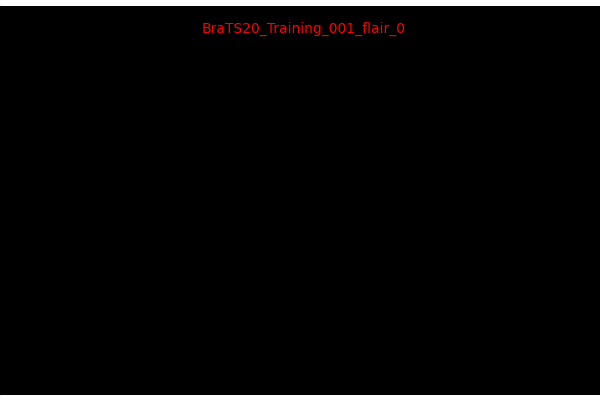

In [ ]:
## matching colormaps
#Greys_r RdGy_r  CMRmap afmhot binary_r bone copper cubehelix gist_heat gist_stern gnuplot hot inferno magma nipy_spectral


from tqdm import tqdm
import os
from random import randint

import numpy as np
import pandas as pd

import nibabel as nib
import pydicom as pdm
import nilearn as nl
import nilearn.plotting as nlplt
import nrrd
import h5py

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as anim

import imageio
from skimage.transform import resize
from skimage.util import montage

from IPython.display import Image as show_gif

import warnings
warnings.simplefilter("ignore")

sample_filename = "/content/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii"
sample_filename_mask = '/content/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii'

sample_img = nib.load(sample_filename)
sample_img = np.asanyarray(sample_img.dataobj)
sample_mask = nib.load(sample_filename_mask)
sample_mask = np.asanyarray(sample_mask.dataobj)
print("img shape ->", sample_img.shape)
print("mask shape ->", sample_mask.shape)

sample_data_gif = ImageToGIF()
label = sample_filename.replace('/', '.').split('.')[-2]
filename = f'{label}_3d_2d.gif'

for i in range(sample_img.shape[0]):
    image = np.rot90(sample_img[i])
    mask = np.clip(np.rot90(sample_mask[i]), 0, 1)
    sample_data_gif.add(image, mask, label=f'{label}_{str(i)}')

sample_data_gif.save(filename, fps=15)
show_gif(filename, format='png')

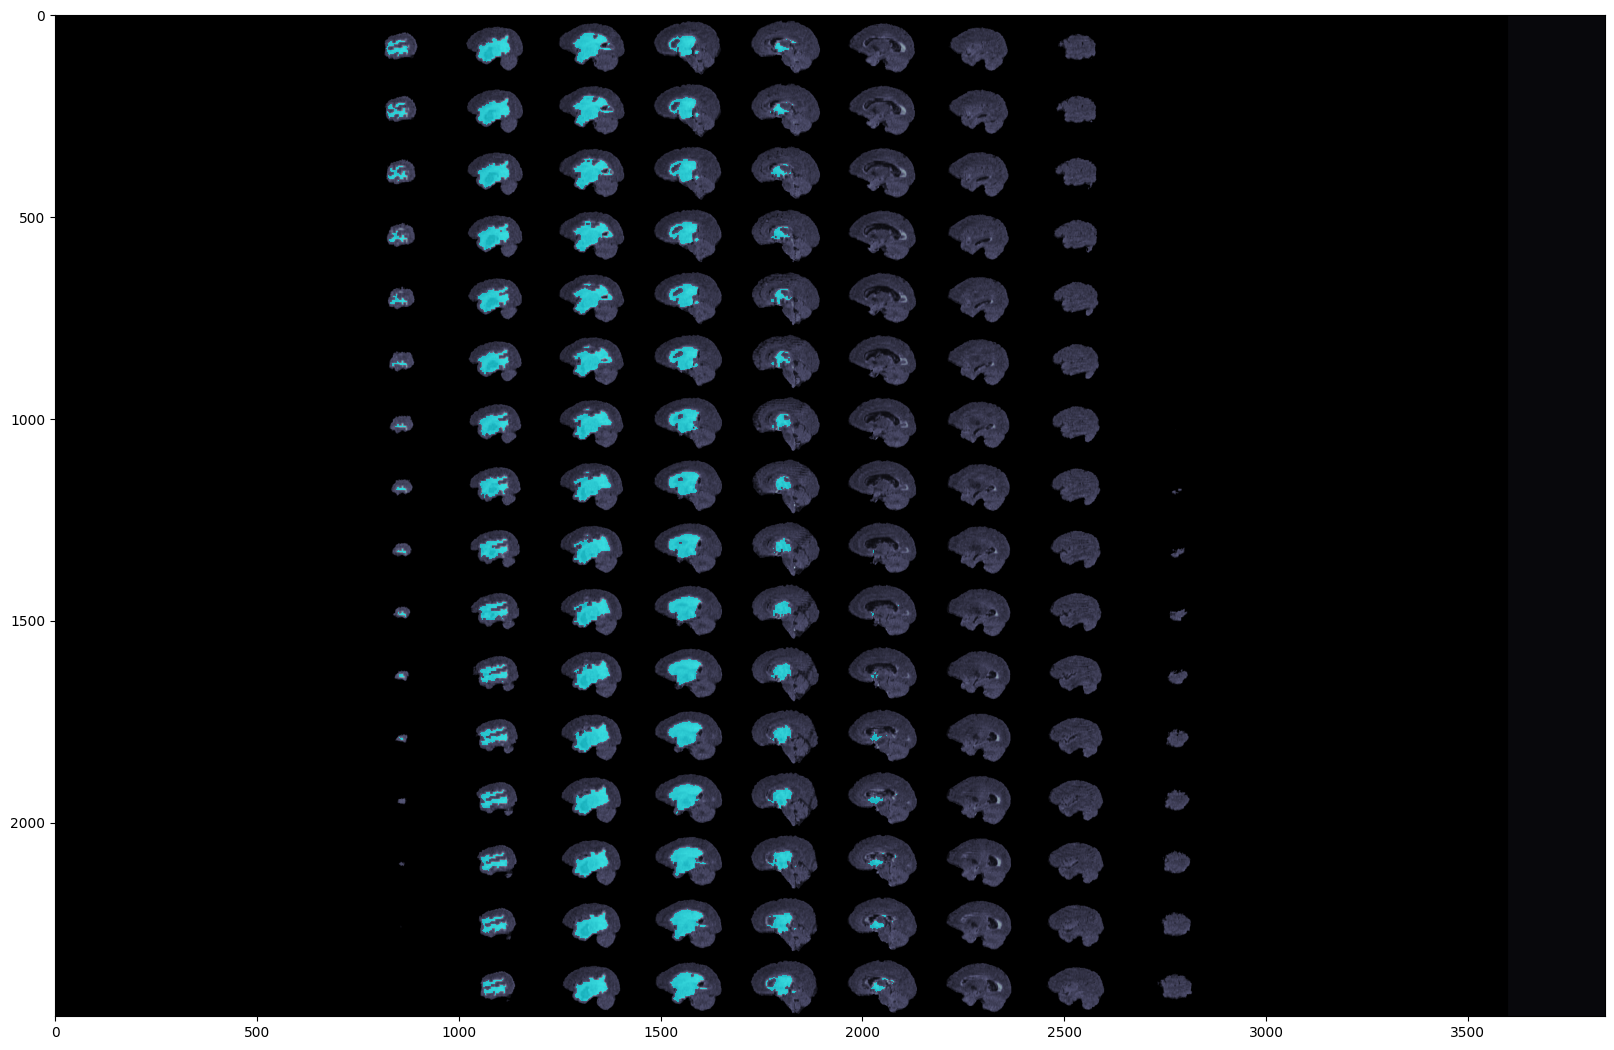

In [ ]:
image = np.rot90(montage(sample_img))
mask = np.rot90(montage(sample_mask))
mask = np.clip(mask, 0, 1)

fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(image, cmap ='bone')
ax1.imshow(np.ma.masked_where(mask == False, mask),
           cmap='cool', alpha=0.6, animated=True)
fig.savefig(f'{label}_3d_to_2d.png', format='png', bbox_inches='tight', pad_inches=0.0)

(55, 55, 55)


100%|██████████| 72/72 [46:56<00:00, 39.11s/it]


ValueError: all input arrays must have the same shape

<Figure size 1500x1000 with 0 Axes>

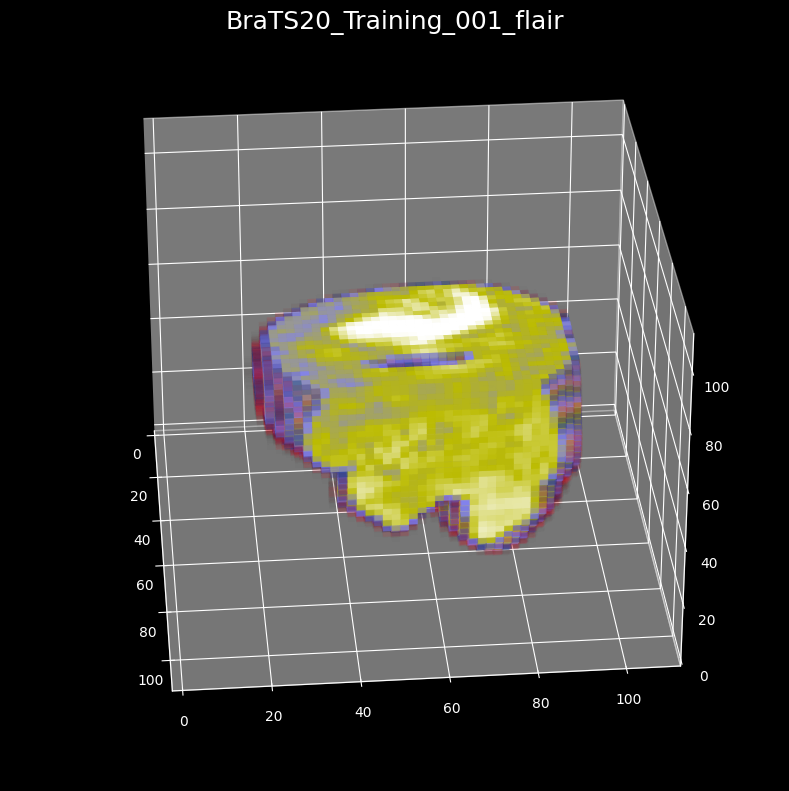

In [ ]:

%%time
title = sample_filename.replace(".", "/").split("/")[-2]
filename = title+"_3d.gif"

data_to_3dgif = Image3dToGIF3d()#img_dim = (120, 120, 78)
transformed_data = data_to_3dgif.get_transformed_data(sample_img)
data_to_3dgif.plot_cube(
    transformed_data[:38, :47, :35],#[:77, :105, :55]
    title=title,
    make_gif=True,
    path_to_save=filename
)
show_gif(filename, format='png')

Nilearn visualization

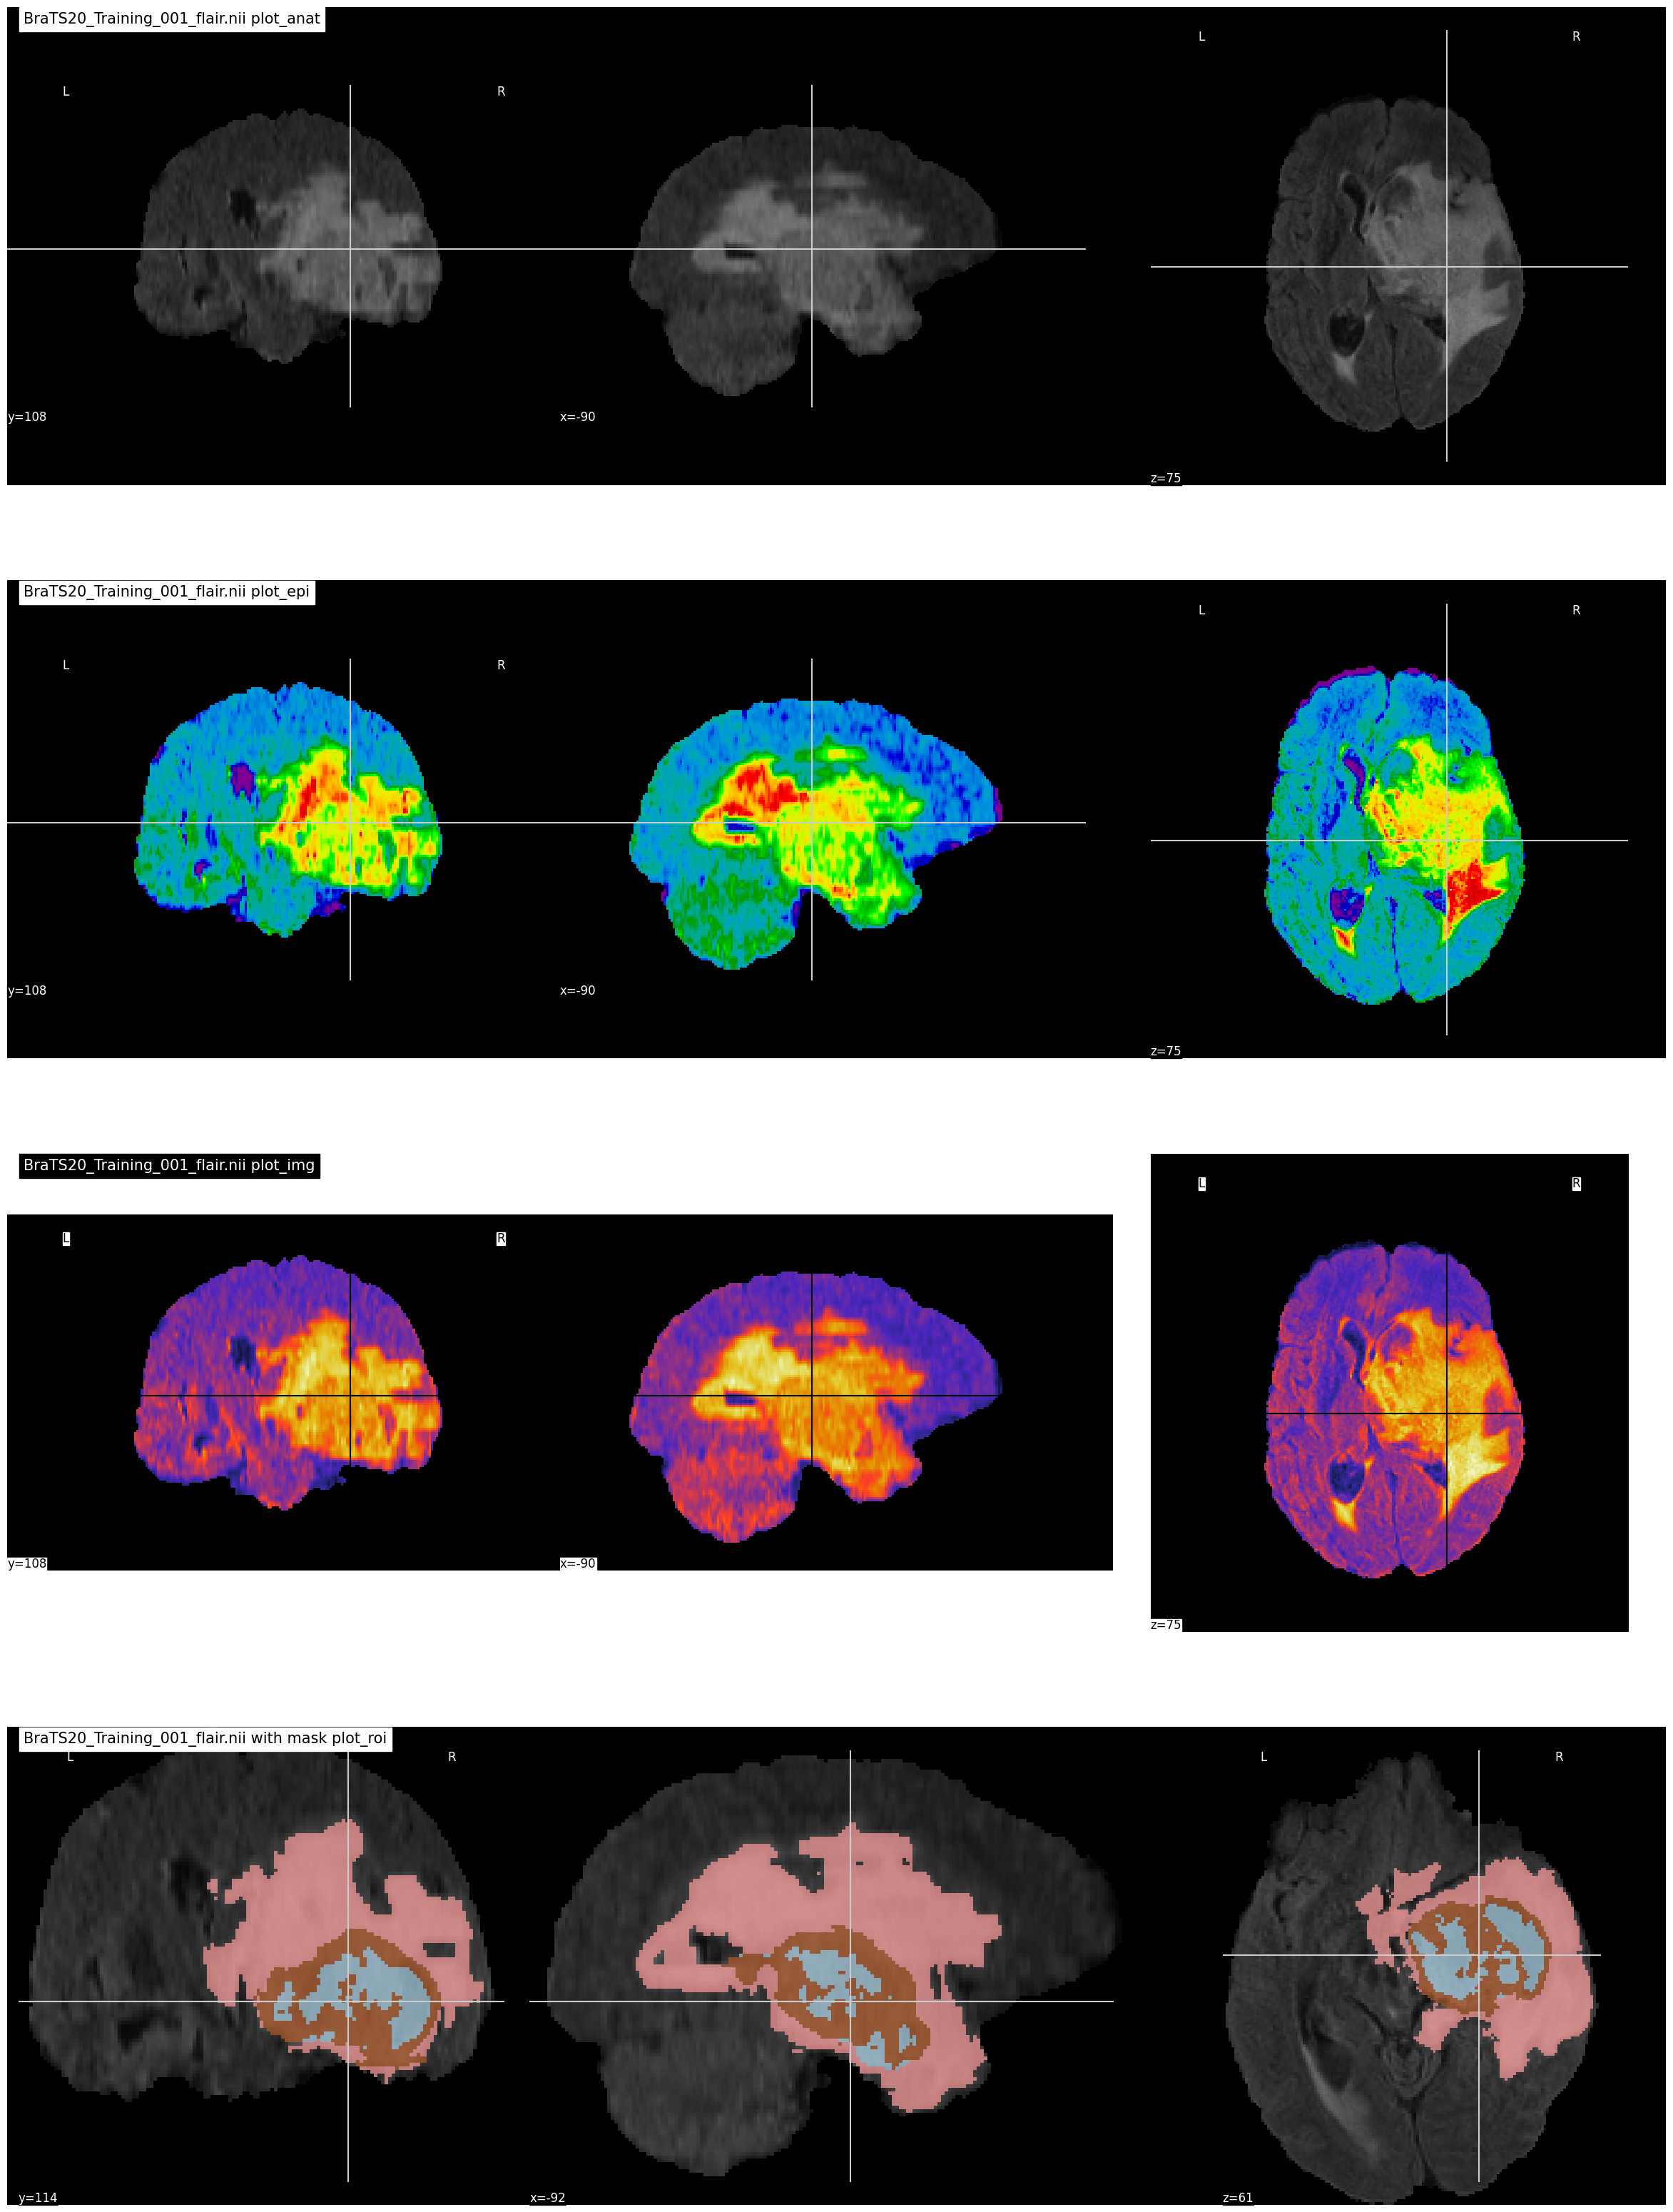

In [ ]:
niimg = nl.image.load_img(sample_filename)
nimask = nl.image.load_img(sample_filename_mask)

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))


nlplt.plot_anat(niimg,
                title='BraTS20_Training_001_flair.nii plot_anat',
                axes=axes[0])

nlplt.plot_epi(niimg,
               title='BraTS20_Training_001_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS20_Training_001_flair.nii plot_img',
               axes=axes[2])

nlplt.plot_roi(nimask,
               title='BraTS20_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg,
               axes=axes[3], cmap='Paired')

plt.show()

In [ ]:
sample_filename = '/content/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'
sample_filename_mask = '/content/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii'

sample_img = nib.load(sample_filename)
sample_img = np.asanyarray(sample_img.dataobj)
sample_img = np.rot90(sample_img)
sample_mask = nib.load(sample_filename_mask)
sample_mask = np.asanyarray(sample_mask.dataobj)
sample_mask = np.rot90(sample_mask)
print("img shape ->", sample_img.shape)
print("mask shape ->", sample_mask.shape)

img shape -> (240, 240, 155)
mask shape -> (240, 240, 155)


In [ ]:
# prompt: 3d image size

print("img shape ->", sample_img.shape)

img shape -> (240, 240, 155)


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Load the 3D MRI file
file_path = '/content/BraTS20_Training_001_flair_3d_2d.gif'  # Replace with actual file path
mri_image = nib.load(file_path)
mri_data = mri_image.get_fdata()

# Visualize the slices
num_slices = mri_data.shape[2]  # Assuming 3rd dimension has the slice count
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Display 5 evenly spaced slices
for i, ax in enumerate(axes):
    slice_index = i * (num_slices // 5)
    ax.imshow(mri_data[:, :, slice_index], cmap='gray')
    ax.set_title(f'Slice {slice_index}')
    ax.axis('off')

plt.show()


ImageFileError: Cannot work out file type of "/content/BraTS20_Training_001_flair_3d_2d.gif"

In [ ]:
# prompt: visualisation of 3d image by iterating over all the slices

%%time
title = sample_filename.replace(".", "/").split("/")[-2]
filename = title+"_3d.gif"

data_to_3dgif = Image3dToGIF3d()  # img_dim = (120, 120, 78)
transformed_data = data_to_3dgif.get_transformed_data(sample_img)

# Iterate through slices in all 3 dimensions and create a GIF
for axis in range(3):
    for slice_num in tqdm(range(transformed_data.shape[axis])):
        if axis == 0:
            current_slice = transformed_data[slice_num, :, :]
        elif axis == 1:
            current_slice = transformed_data[:, slice_num, :]
        else:
            current_slice = transformed_data[:, :, slice_num]

        data_to_3dgif.plot_cube(
            current_slice,
            title=f"{title}_axis_{axis}_slice_{slice_num}",
            make_gif=True,
            path_to_save=f"{filename}_{axis}_{slice_num}.gif"
        )

# You can choose to display a specific GIF or combine them into a larger animation.
show_gif(f"{filename}_0_10.gif", format='png') # Example: Show a specific GIF

(55, 55, 55)


  0%|          | 0/55 [00:00<?, ?it/s]<ipython-input-25-cbf294cbba65>:160: RuntimeWarning: invalid value encountered in divide
  return arr / arr.max()
  0%|          | 0/55 [00:00<?, ?it/s]


ValueError: not enough values to unpack (expected 3, got 2)

----------------------------------------------------------------------

Machine learning Prediction

----------------------------------------------------------------------------------------------------------------------------------------

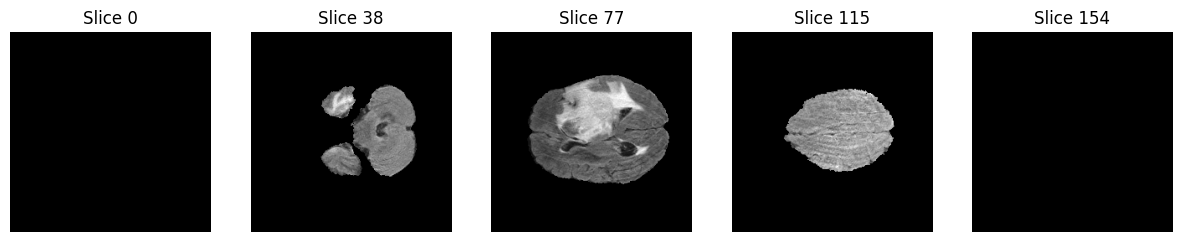

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 128,  │              0 │ -                      │
│                           │ 1)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d (Conv3D)           │ (None, 128, 128, 128,  │          1,792 │ input_layer[0][0]      │
│                           │ 64)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_1 (Conv3D)         │ (None, 128, 128, 128,  │        110,656 │ conv3d[0][0]           │
│                           │ 64)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d             │ (None, 64, 64, 64, 64) │              0 │ conv3d_1[0][0]         │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_2 (Conv3D)         │ (None, 64, 64, 64,     │        221,312 │ max_pooling3d[0][0]    │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_3 (Conv3D)         │ (None, 64, 64, 64,     │        442,496 │ conv3d_2[0][0]         │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_1           │ (None, 32, 32, 32,     │              0 │ conv3d_3[0][0]         │
│ (MaxPooling3D)            │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_4 (Conv3D)         │ (None, 32, 32, 32,     │        884,992 │ max_pooling3d_1[0][0]  │
│                           │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_5 (Conv3D)         │ (None, 32, 32, 32,     │      1,769,728 │ conv3d_4[0][0]         │
│                           │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_transpose          │ (None, 64, 64, 64,     │        262,272 │ conv3d_5[0][0]         │
│ (Conv3DTranspose)         │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 64,     │              0 │ conv3d_transpose[0][0… │
│                           │ 256)                   │                │ conv3d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_6 (Conv3D)         │ (None, 64, 64, 64,     │        884,864 │ concatenate[0][0]      │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_7 (Conv3D)         │ (None, 64, 64, 64,     │        442,496 │ conv3d_6[0][0]         │
│                           │ 128)                   │                │                        │
├──────────────────────

 Total params: 5,418,177 (20.67 MB)

 Trainable params: 5,418,177 (20.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# === Step 1: Load and Preprocess the MRI Data ===

def load_mri_data(file_path):
    """
    Loads a 3D MRI scan file and returns the image data.
    """
    mri_image = nib.load(file_path)
    mri_data = mri_image.get_fdata()
    return mri_data

def normalize_mri_data(mri_data):
    """
    Normalizes the MRI data to a range of 0 to 1 using min-max normalization.
    """
    mri_data = (mri_data - np.min(mri_data)) / (np.max(mri_data) - np.min(mri_data))
    return mri_data

def rescale_mri_slice(mri_data, slice_index=78, target_size=(128, 128)):
    """
    Rescales a middle slice of the MRI data to the target size.
    """
    middle_slice = mri_data[:, :, slice_index]  # Assuming slice_index is a central slice
    rescaled_slice = tf.image.resize(middle_slice[..., np.newaxis], target_size)
    return rescaled_slice.numpy().squeeze()

# Example file path (replace with your actual path)
file_path = '/content/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii'  # Update with the actual file path

# Load and preprocess data
mri_data = load_mri_data(file_path)
mri_data = normalize_mri_data(mri_data)
rescaled_slice = rescale_mri_slice(mri_data)

# === Step 2: Visualize MRI Slices ===

def visualize_mri_slices(mri_data, num_slices=5):
    """
    Visualizes a few slices from the 3D MRI data.
    """
    num_slices = min(num_slices, mri_data.shape[2])
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    slice_indices = np.linspace(0, mri_data.shape[2] - 1, num_slices, dtype=int)

    for i, ax in enumerate(axes):
        ax.imshow(mri_data[:, :, slice_indices[i]], cmap='gray')
        ax.set_title(f'Slice {slice_indices[i]}')
        ax.axis('off')
    plt.show()

visualize_mri_slices(mri_data)

# === Step 3: Build the 3D U-Net Model ===

def unet_3d(input_shape=(128, 128, 128, 1)):
    """
    Creates a 3D U-Net model for brain tumor segmentation.
    """
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling3D((2, 2, 2))(conv1)

    conv2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling3D((2, 2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv3)

    # Decoder
    up4 = layers.Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv3)
    up4 = layers.concatenate([up4, conv2])
    conv4 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(up4)
    conv4 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv4)

    up5 = layers.Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv4)
    up5 = layers.concatenate([up5, conv1])
    conv5 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(up5)
    conv5 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv5)

    # Output layer
    outputs = layers.Conv3D(1, (1, 1, 1), activation='sigmoid')(conv5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate and compile the model
input_shape = (128, 128, 128, 1)  # Adjust if necessary
model = unet_3d(input_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# === Step 4: Model Training Setup ===

# This section will use placeholders for train and validation data.
# You need to load the actual MRI dataset and their segmentations for training.

# Placeholder data (replace with your actual data loading pipeline)
# train_data, train_labels = ...  # Load preprocessed training data and labels
# val_data, val_labels = ...      # Load preprocessed validation data and labels

# # Training the model (Uncomment after setting up train_data and train_labels)
# history = model.fit(
#     x=train_data,
#     y=train_labels,
#     validation_data=(val_data, val_labels),
#     epochs=50,
#     batch_size=32
# )

# === End of the Code ===


In [ ]:
import numpy as np
import nibabel as nib
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# === Step 1: Load and Preprocess the MRI Data ===

def load_mri_data(file_path):
    """Loads a 3D MRI scan file and returns the image data."""
    mri_image = nib.load(file_path)
    mri_data = mri_image.get_fdata()
    return mri_data

def normalize_mri_data(mri_data):
    """Normalizes the MRI data to a range of 0 to 1 using min-max normalization."""
    mri_data = (mri_data - np.min(mri_data)) / (np.max(mri_data) - np.min(mri_data))
    return mri_data

def rescale_mri_volume(mri_data, target_size=(128, 128, 128)):
    """Rescales the MRI volume to the target size."""
    mri_data = tf.image.resize(mri_data, target_size)
    return mri_data.numpy()

# === Step 2: Define the 3D U-Net Model ===

def unet_3d(input_shape=(128, 128, 128, 1)):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling3D((2, 2, 2))(conv1)

    conv2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling3D((2, 2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same')(conv3)

    # Decoder
    up4 = layers.Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv3)
    up4 = layers.concatenate([up4, conv2])
    conv4 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(up4)
    conv4 = layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv4)

    up5 = layers.Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(conv4)
    up5 = layers.concatenate([up5, conv1])
    conv5 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(up5)
    conv5 = layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same')(conv5)

    # Output layer
    outputs = layers.Conv3D(1, (1, 1, 1), activation='sigmoid')(conv5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model
input_shape = (128, 128, 128, 1)
model = unet_3d(input_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# === Step 3: Train the Model ===

# Load training data paths and preprocess
# Replace these file paths with the actual paths to your training data
train_file_path = '/content/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
train_label_path = '/content/dataset/BraTS2020/BraTS2020_TrainingData/.../seg.nii'

# Load and preprocess the training images and masks
train_img = load_mri_data(train_file_path)
train_img = normalize_mri_data(train_img)
train_img_rescaled = rescale_mri_volume(train_img)

train_mask = load_mri_data(train_label_path)
train_mask = rescale_mri_volume(train_mask)

# Add batch and channel dimensions
train_img_rescaled = train_img_rescaled[np.newaxis, ..., np.newaxis]
train_mask = train_mask[np.newaxis, ..., np.newaxis]

# Train the model
history = model.fit(
    x=train_img_rescaled,
    y=train_mask,
    epochs=10,  # Set to 10 for demonstration; increase as needed
    batch_size=1,
    verbose=1
)

# Save the model after training
model.save_weights("3d_unet_model.h5")
print("Model trained and saved as '3d_unet_model.h5'")

# === Step 4: Prediction on Validation Data ===

# Load and preprocess validation data
validation_file_path = '/content/dataset/BraTS2020/BraTS2020_TrainingData/BraTS2020_TrainingData/.../flair.nii'
validation_img = load_mri_data(validation_file_path)
validation_img = normalize_mri_data(validation_img)
validation_img_rescaled = rescale_mri_volume(validation_img)

# Reshape to add batch and channel dimensions
validation_img_rescaled = validation_img_rescaled[np.newaxis, ..., np.newaxis]

# Load the trained model weights if not loaded yet
model.load_weights("3d_unet_model.h5")

# Predict the tumor mask
prediction = model.predict(validation_img_rescaled)

# === Determine Tumor Presence ===

tumor_threshold = 0.5
predicted_mask = prediction[0, ..., 0]  # Remove batch and channel dimensions
tumor_present = np.any(predicted_mask > tumor_threshold)

if tumor_present:
    print("Tumor Detected")
else:
    print("No Tumor Detected")

# Visualization of predicted mask
def visualize_prediction(predicted_mask, num_slices=5):
    """Visualizes a few slices from the predicted 3D mask."""
    fig, axes = plt.subplots(1, num_slices, figsize=(15, 5))
    slice_indices = np.linspace(0, predicted_mask.shape[2] - 1, num_slices, dtype=int)

    for i, ax in enumerate(axes):
        ax.imshow(predicted_mask[:, :, slice_indices[i]], cmap='gray')
        ax.set_title(f'Slice {slice_indices[i]}')
        ax.axis('off')
    plt.show()

visualize_prediction(predicted_mask)


ImageFileError: Cannot work out file type of "/content/dataset/BraTS2020/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"